In [4]:
import numpy as np
from scipy import constants 
import scipy

#visuals
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

#Interactive
from ipywidgets.widgets import * 
import ipywidgets as widgets

#Hugo code
import Utility
import PythonKEX 

<IPython.core.display.Javascript object>


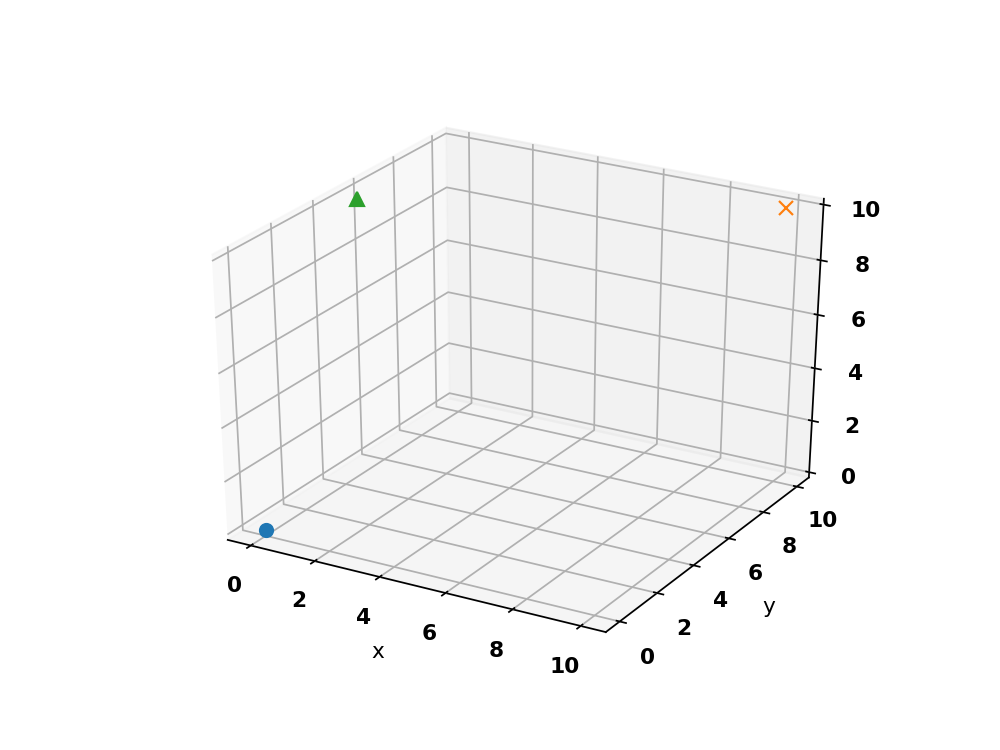

In [6]:
#look at empty image
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot([0], [0], [0], 'o')
plt.plot([10],[10], [10], 'x')
plt.plot([0], [5], [10], '^')
plt.xlabel('x')
plt.ylabel('y')
#plt.zlabel(dim_titles[2])
plt.show()

<IPython.core.display.Javascript object>


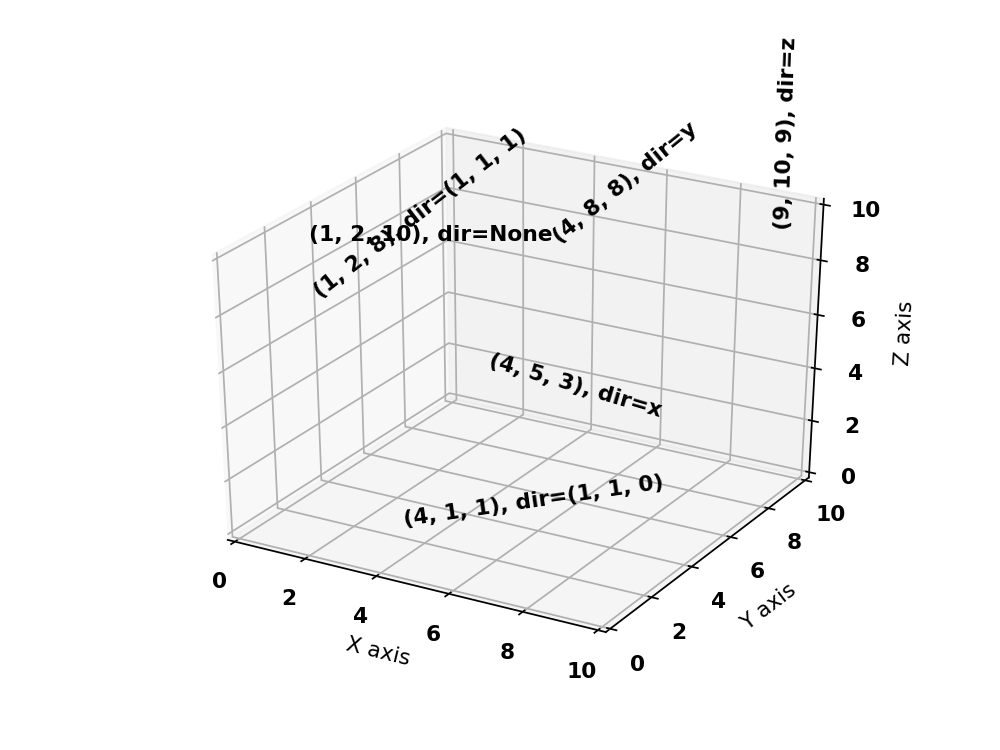

In [7]:
#more advance example
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

# Demo 1: zdir
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = (1, 4, 4, 9, 4, 1)
ys = (2, 5, 8, 10, 1, 2)
zs = (10, 3, 8, 9, 1, 8)

for zdir, x, y, z in zip(zdirs, xs, ys, zs):
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
    ax.text(x, y, z, label, zdir)

# Demo 2: color
#ax.text(9, 0, 0, "red", color='red')

# Demo 3: text2D
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
#ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)

# Tweaking display region and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [1]:
def view3DImages(images, fixedValue, subplotShape = None, titles=None, xAxisLabel=None, yAxisLabel=None, figsize=None):
    """ plots 2D slices of 3D images in subplots at position fixedValue of image dimension 0. 
    figure size is set with figsize
    titles and y,x -AxisLabel can be set
    Default subplot shape (None) is (len(images), 1) """
    imageShape = np.array(images[0].shape)
    sliceShape = imageShape[:2]
    if subplotShape is None:
        subplotShape = [len(images), 1]
    for k in range(len(images)):
        plt.subplot(subplotShape[0], subplotShape[1], k+1)
        plt.imshow(images[k][fixedValue])
        plt.xlabel(xAxisLabel)
        plt.ylabel(yAxisLabel)
        if titles is not None:
            plt.title(titles[k])

In [2]:
def viewNDImages(images, fixedDimensions, fixedValues,  subplotShape = None, 
                 titles=None, axisLabels=None, figsize=None):
    """ plots 2D slices of N-dimensional images in subplots at position fixedValue of image dimensions fixedDimensions. """
    print("fixD", fixedDimensions)
    print("fixV", fixedValues)
    print("axis labels", axisLabels)
    
    #try to find a nice way to grid them
    #assume images have the same size
    images = np.array(images)
    #make sure the array is sorted
    index_array = np.argsort(fixedDimensions)
    print("index ar", (np.array(index_array),))
    fixedDimensions = np.array(fixedDimensions)[index_array]
    fixedValues = np.array(fixedValues)[index_array]
    #change axis labels correspondingly
    if axisLabels is None:
        axisLabels = [None, None]
    
    #determine which axes to move to the back, per image
    freeDimensions = np.ones((images.ndim-1,), dtype=int)
    freeDimensions[list(fixedDimensions)] = 0
    source = np.nonzero(freeDimensions)[0] + 1
    destination = (-2,-1)
    
    # " Move axes of an array to new positions.
    # Other axes remain in their original order. "
    images = np.moveaxis(a=images, source=source,destination=destination)
    %matplotlib inline
    plt.figure(figsize=figsize)
    if subplotShape is None:
        subplotShape = [len(images), 1]
    for k in range(len(images)):
        plt.subplot(subplotShape[0], subplotShape[1], k+1)
        plt.imshow(images[(k,) + tuple(fixedValues)])
        plt.xlabel(axisLabels[0])
        plt.ylabel(axisLabels[1])
        if titles is not None:
            plt.title(titles[k])

In [3]:
def interactiveNDImages(images, subplotShape = None, 
                 imageTitles=None, dimensionAxisLabels=None, figsize=None):
    """ creates interactive widgets and interact these with viewNDImages (dimension selection and positioning). 
    Image axis labels and image titles can be specified but default to None. 
    The first dimension of images sequence is reserved for distinguishing images.
    currently not working. """
    
    #Actually, I want to have 4 widgets: additional to select the "dimension" within the widgets
    # then I want to store the current state and send that as input to viewNDImages
    imageDimensions = np.arange(np.ndim(images) - 1, dtype=int)
    freeDimensions = imageDimensions[:2]
    bFixed = np.zeros_like(imageDimensions, dtype=bool)
    bFixed[2:] = True
    fixedDimensions = imageDimensions[bFixed]

    # trim positions before sending to viewNDImages
    fixedPositions = np.zeros(np.ndim(images)-1, dtype=int)
    
    sliceWidget = widgets.IntSlider(min=0, max=len(freeDimensions)-1, 
                                                      description="select slice dim. to vary")
    freeDimensionWidget = widgets.Dropdown(options=[0], value=0)
    fixedDimensionWidget = widgets.Dropdown(options=fixedDimensions, 
                                            description = "select fixed dim. of image to vary")  
    fixedPositionWidget = widgets.IntSlider(min=0)
    
    def updateFreeDimensionWidget(*args):
        freeDimensionWidget.description = "set slice dim. " + str(sliceWidget.value) + " to image dim."
        freeDimensionWidget.value = freeDimensions[sliceWidget.value]
        freeDimensionWidget.options = np.append(freeDimensionWidget.value, fixedDimensions)
        
    sliceWidget.observe(updateFreeDimensionWidget, 'value') 
    updateFreeDimensionWidget()
    
    def updateFixedDimensionWidget(*args):
        fixedDimensionWidget.options = fixedDimensions
    
    freeDimensionWidget.observe(updateFixedDimensionWidget, 'value')
    
    def updateFixedPositionWidget(*args):
        fixedPositionWidget.description = "fix dim. " + str(fixedDimensionWidget.value) + " at"
        fixedPositionWidget.value = fixedPositions[fixedDimensionWidget.value]
        fixedPositionWidget.max = np.shape(images)[fixedDimensionWidget.value+1] - 1
        
    fixedDimensionWidget.observe(updateFixedPositionWidget, 'value')
    updateFixedPositionWidget()
    
    #comment solution
    inside = True
    
    if not inside:
        #should these internal state updates be here or in the interactive function? 
        # no, interact send the value of the widgets, and widget values are non-interactible
        # although maybe we can ust use the values
        def updateDimensionSelection(*args):
            #swap places
            temp = freeDimensions[sliceWidget.value]
            freeDimensions[sliceWidget.value] = freeDimensionWidget.value
            bFixed[temp] = True
            bFixed[freeDimensionWidget.value] = False
            fixedDimensions = imageDimensions[bFixed]

        fixedDimensionWidget.observe(updateDimensionSelection, 'value')
        updateDimensionSelection()

        def updateFixedPositions(*args):
            fixedPositions[fixedDimensionWidget.value] = fixedPositionWidget.value

        fixedPositionWidget.observe(updateFixedPositions, 'value')
        updateFixedPositions()

        axisLabels = [None, None]
        if dimensionAxisLabels is not None:
            def updateAxisLabels(*args):
                for k,dim in enumerate(freeDimensions):
                    axisLabels[k] = dimensionAxisLabels[dim]
                    
            freeDimensionWidget.observe(updateAxisLabels, 'value')
            updateAxisLabels()
    
    #isolate interactive parameters
    def interactiveView(sliceDim, freeDim, fixDim,fixPos):
        print("free dim.", freeDimensions)
        print("fix dim.", fixedDimensions)
        print("fix pos", fixedPositions)
        if inside:
            #swap places
            temp = freeDimensions[sliceDim]
            freeDimensions[sliceDim] = freeDim
            bFixed[temp] = True
            bFixed[freeDim] = False
            fixedDimensions = imageDimensions[bFixed]
            #update position
            fixedPositions[fixDim] = fixPos

            axisLabels = [None, None]
            if dimensionAxisLabels is not None:
                for k,dim in enumerate(freeDimensions):
                    axisLabels[k] = dimensionAxisLabels[dim]
        
        viewNDImages(images=images, fixedDimensions=fixedDimensions, fixedValues=fixedPositions[bFixed],
                 subplotShape=subplotShape, titles=imageTitles, axisLabels=axisLabels, figsize=figsize)
    
    interact(interactiveView, sliceDim=sliceWidget, freeDim=freeDimensionWidget, fixDim=fixedDimensionWidget, fixPos=fixedPositionWidget)